In [1]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf
import keras
# Import the dataset
from keras.datasets import mnist

# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

Using TensorFlow backend.


# Train Data

In [2]:

animal_images = []
for label_name in glob.glob("C:/Users/ankush/Downloads/train/"):
    for image_path in glob.glob(os.path.join(label_name,"*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        animal_images.append(image)
animal_images=np.array(animal_images)

In [3]:
categories = []
filenames = os.listdir("C:/Users/ankush/Downloads/train")
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

<function list.count>

In [27]:
df = pd.DataFrame({
    'categories': categories ,'filenames':filenames})
df.head()


,categories,filenames
0,0,cat.0.jpg
1,0,cat.1.jpg
2,0,cat.10.jpg
3,0,cat.100.jpg
4,0,cat.1000.jpg


In [7]:
animal_images_test = []
for label_name in glob.glob("C:/Users/ankush/Downloads/test1/"):
    for image_path in glob.glob(os.path.join(label_name,"*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        animal_images_test.append(image)
animal_images_test=np.array(animal_images_test)

In [8]:
categories_test = []
filenames1 = os.listdir("C:/Users/ankush/Downloads/test1")
for filename in filenames1:
    category = filename.split('.')[0]
    if category == 'dog':
        categories_test.append(1)
    else:
        categories_test.append(0)

In [9]:

X_train,X_test = animal_images,animal_images_test
Y_train,Y_test = categories,categories_test

#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255

#Reshaping to a flattened version
X_train_flat = X_train.reshape(X_train.shape[0],100*100*3)
X_test_flat = X_test.reshape(X_test.shape[0],100*100*3)



#Encoding the output
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_train_flat.shape, X_test_flat.shape)

Original Sizes: (25000, 100, 100, 3) (12500, 100, 100, 3) (25000, 2) (12500, 1)
Flattened: (25000, 30000) (12500, 30000)


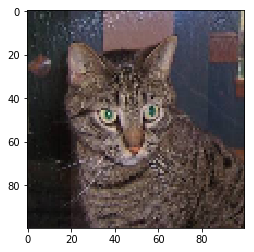

In [50]:
plt.imshow(animal_images[1])

In [10]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,3,)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_train, Y_train))
score = model.evaluate(X_train, Y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 694s 28ms/step - loss: 0.7259 - acc: 0.6066 - val_loss: 0.6753 - val_acc: 0.5937
Epoch 2/10
25000/25000 [==============================] - 666s 27ms/step - loss: 0.5690 - acc: 0.7053 - val_loss: 0.5050 - val_acc: 0.7492
Epoch 3/10
25000/25000 [==============================] - 666s 27ms/step - loss: 0.5096 - acc: 0.7501 - val_loss: 0.4422 - val_acc: 0.7946
Epoch 4/10
25000/25000 [==============================] - 674s 27ms/step - loss: 0.4535 - acc: 0.7886 - val_loss: 0.4163 - val_acc: 0.7994
Epoch 5/10
25000/25000 [==============================] - 665s 27ms/step - loss: 0.4114 - acc: 0.8136 - val_loss: 0.3680 - val_acc: 0.8234
Epoch 6/10
25000/25000 [==============================] - 672s 27ms/step - loss: 0.3608 - acc: 0.8380 - val_loss: 0.2551 - val_acc: 0.9022
Epoch 7/10
25000/25000 [==============================] - 668s 27ms/step - loss: 0.3109 - acc: 0.8647 - val_loss: 0.

In [104]:
Y_train.shape

(37500, 2)

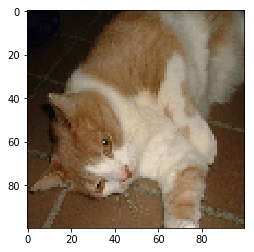

In [23]:
plt.imshow(X_train[4000])

The cat is labelled as 0,so we should expect prediction to come at 0 for X_train[4000]

Hence predicting came to be correct for dog

In [22]:
model.predict_classes(X_train[4000].reshape(1,100,100,3))

array([0], dtype=int64)